# Домашнее задание 2. Классификация изображений.

В этом задании потребуется обучить классификатор изображений. Будем работать с датасетом, название которого раскрывать не будем. Можете посмотреть самостоятельно на картинки, которые в есть датасете. В нём 200 классов и около 5 тысяч картинок на каждый класс. Классы пронумерованы, как нетрудно догадаться, от 0 до 199. Скачать датасет можно вот [тут](https://yadi.sk/d/BNR41Vu3y0c7qA).

Структура датасета простая -- есть директории train/ и val/, в которых лежат обучающие и валидационные данные. В train/ и val/ лежат директориии, соответствующие классам изображений, в которых лежат, собственно, сами изображения.

__Задание__. Необходимо выполнить два задания

1) Добейтесь accuracy **на валидации не менее 0.44**. В этом задании **запрещено** пользоваться предобученными моделями и ресайзом картинок. 5 баллов

2) Добейтесь accuracy **на валидации не менее 0.84**. В этом задании делать ресайз и использовать претрейн можно. 5 баллов

Напишите краткий отчёт о проделанных экспериментах. Что сработало и что не сработало? Почему вы решили, сделать так, а не иначе? Обязательно указывайте ссылки на чужой код, если вы его используете. Обязательно ссылайтесь на статьи / блогпосты / вопросы на stackoverflow / видосы от ютуберов-машинлернеров / курсы / подсказки от Дяди Васи и прочие дополнительные материалы, если вы их используете.

Ваш код обязательно должен проходить все `assert`'ы ниже.

__Использовать внешние данные для обучения строго запрещено в обоих заданиях. Также запрещено обучаться на валидационной выборке__.


__Критерии оценки__: Оценка вычисляется по простой формуле: `min(10, 10 * Ваша accuracy / 0.44)` для первого задания и `min(10, 10 * (Ваша accuracy - 0.5) / 0.34)` для второго. Оценка округляется до десятых по арифметическим правилам.


__Советы и указания__:
 - Наверняка вам потребуется много гуглить о классификации и о том, как заставить её работать. Это нормально, все гуглят. Но не забывайте, что нужно быть готовым за скатанный код отвечать :)
 - Используйте аугментации. Для этого пользуйтесь модулем `torchvision.transforms` или библиотекой [albumentations](https://github.com/albumentations-team/albumentations)
 - Можно обучать с нуля или файнтюнить (в зависимости от задания) модели из `torchvision`.
 - Рекомендуем написать вам сначала класс-датасет (или воспользоваться классом `ImageFolder`), который возвращает картинки и соответствующие им классы, а затем функции для трейна по шаблонам ниже. Однако делать это мы не заставляем. Если вам так неудобно, то можете писать код в удобном стиле. Однако учтите, что чрезмерное изменение нижеперечисленных шаблонов увеличит количество вопросов к вашему коду и повысит вероятность вызова на защиту :)
 - Валидируйте. Трекайте ошибки как можно раньше, чтобы не тратить время впустую.
 - Чтобы быстро отладить код, пробуйте обучаться на маленькой части датасета (скажем, 5-10 картинок просто чтобы убедиться что код запускается). Когда вы поняли, что смогли всё отдебажить, переходите обучению по всему датасету
 - На каждый запуск делайте ровно одно изменение в модели/аугментации/оптимайзере, чтобы понять, что и как влияет на результат.
 - Фиксируйте random seed.
 - Начинайте с простых моделей и постепенно переходите к сложным. Обучение лёгких моделей экономит много времени.
 - Ставьте расписание на learning rate. Уменьшайте его, когда лосс на валидации перестаёт убывать.
 - Советуем использовать GPU. Если у вас его нет, используйте google colab. Если вам неудобно его использовать на постоянной основе, напишите и отладьте весь код локально на CPU, а затем запустите уже написанный ноутбук в колабе. Авторское решение задания достигает требуемой точности в колабе за 15 минут обучения.

Good luck & have fun! :)

In [ ]:
!pip install wandb
!pip3 install pytorch_lightning torchmetrics

**✨ Внимание ✨**

В этом домашнем задании предлагается использовать библиотеку `pytorch_lightning`. Доступ к ее [документации](https://lightning.ai/docs/pytorch/stable/) заблокирован с территории РФ. Вы можете:

1. Получить к ней доступ с помощью VPN.

2. Собрать документацию самостоятельно. Для этого склонируйте [github-репозиторий](https://github.com/Lightning-AI/lightning/tree/master), запустите в нем терминал (на windows – git bash) и выполните команды:

```shell
git submodule update --init --recursive
make docs
```
После этого откройте появившийся файл `docs/build/html/index.html`. Для работы команд в вашем окружении должен быть `pip`. Полная инструкция [по ссылке](https://github.com/Lightning-AI/lightning/tree/master/docs).

3. Гуглить `<error message> pytorch lightning` или `<how to do this> pytorch lightning`. Stack overflow на территории РФ все еще доступен 😉

4. Не пользоваться `pytorch_lightning` и написать цикл обучения модели самостоятельно. Например, по аналогии с функцией `fit` из [семинара 4](https://github.com/hse-ds/iad-deep-learning/blob/master/2023/seminars/04.%20Optim%20%26%20Lightning/04_Optim%26Lightning_solution.ipynb).

In [ ]:
import wandb

wandb.login()

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
import math
import os
import random
import sys

import matplotlib.pyplot as plt
import numpy as np
import pytorch_lightning as pl
import torch
import torchvision
import torchvision.transforms as transforms
from PIL import Image
from pytorch_lightning.loggers import WandbLogger
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
from torchmetrics.functional import accuracy
from torchvision.datasets import ImageFolder
from tqdm import tqdm
from collections import defaultdict, namedtuple

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
def seed_everything(seed):
    # Фискирует максимум сидов.
    # Это понадобится, чтобы сравнение оптимизаторов было корректным
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True


seed_everything(123456)
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

In [ ]:
!wget https://www.dropbox.com/s/33l8lp62rmvtx40/dataset.zip?dl=1 -O dataset.zip && unzip -q dataset.zip

--2023-11-10 13:38:33--  https://www.dropbox.com/s/33l8lp62rmvtx40/dataset.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/33l8lp62rmvtx40/dataset.zip [following]
--2023-11-10 13:38:33--  https://www.dropbox.com/s/dl/33l8lp62rmvtx40/dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc8d976feeec1c1229e840aee445.dl.dropboxusercontent.com/cd/0/get/CHQuPhrVACS8YJxBcJdCprWe0JllrwUzIO6dClQydotvDj9T29dxxwsSEv1YhBhd2-7dywxvfMLbPYnkkIcaGPilB1DJIskXBR6ddXEuoeQDxo3tqNDsmA9UcILQN_K1HFdRyNrbxI68vA3e7eeTxeA7/file?dl=1# [following]
--2023-11-10 13:38:33--  https://uc8d976feeec1c1229e840aee445.dl.dropboxusercontent.com/cd/0/get/CHQuPhrVACS8YJxBcJdCprWe0JllrwUzIO6dClQydotvDj9T29dxxwsSEv1YhBhd2-7dywxvfMLbPYnkkIcaGPilB1DJIskXBR6ddXE

## Задание 0

### Что поможет сделать на 10 из 10 (одно задание - 5 баллов)

1. Использовать все возможные методы оптимизации и эксперемнтировать с ними.
2. Подбор learning rate. Пример из прошлого семинара как это делать: [Как найти lr](https://pytorch-lightning.readthedocs.io/en/1.4.5/advanced/lr_finder.html)

```
  trainer = pl.Trainer(accelerator="gpu", max_epochs=2, auto_lr_find=True)

  trainer.tune(module, train_dataloader, eval_dataloader)

  trainer.fit(module, train_dataloader, eval_dataloader))
```



3. Аугментация данных. [Документация (полезная)](https://pytorch.org/vision/main/transforms.html), а также [библиотека albumentation](https://towardsdatascience.com/getting-started-with-albumentation-winning-deep-learning-image-augmentation-technique-in-pytorch-47aaba0ee3f8)
4. Подбор архитектуры модели.
5. Можно написать модель руками свою в YourNet, а можно импортировать не предобученную сетку известной архитектуры из модуля torchvision.models. Один из способов как можно сделать:

  * `torchvision.models.resnet18(pretrained=False, num_classes=200).to(device)`
  * Документация по возможным моделям и как их можно брать: [Документация (полезная)](https://pytorch.org/vision/stable/models.html)
6. Правильно нормализовывать данные при создании, пример [тык, но тут и в целом гайд от и до](https://www.pluralsight.com/guides/image-classification-with-pytorch)
7. Model Checkpointing. Сохраняйте свой прогресс (модели), чтобы когда что-то пойдет не так вы сможете начать с этого места или просто воспроизвести свои результаты модели, которые обучали.
 * Пример как можно с wandb тут: [Сохраняем лучшие модели в wandb](https://docs.wandb.ai/guides/integrations/lightning)
 * По простому можно так: [Сохраняем модели в pytorch дока](https://pytorch.org/tutorials/beginner/saving_loading_models.html)

### Подготовка данных

In [ ]:
# в Normalize кладем среднее значение и стандартное отклонение по каждому из каналов. Заимствовано отсюда: https://www.pluralsight.com/guides/image-classification-with-pytorch

train_transform =  transforms.Compose(
    [
        transforms.RandomHorizontalFlip(),
        transforms.AutoAugment(transforms.AutoAugmentPolicy.IMAGENET),
        transforms.ToTensor(),
        transforms.Normalize([0.4802, 0.4481, 0.3975], [0.2296, 0.2263, 0.2255])
    ]
)
val_transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize([0.4802, 0.4481, 0.3975], [0.2296, 0.2263, 0.2255])
    ]
)

train_dataset = ImageFolder('dataset/dataset/train', transform=train_transform)
val_dataset = ImageFolder('dataset/dataset/val', transform=val_transform)

train_dataloader = DataLoader(train_dataset, batch_size=128, shuffle=True,
    num_workers=8, pin_memory = True)
val_dataloader = DataLoader(val_dataset, batch_size=128, shuffle=False,
    num_workers=8, pin_memory = True)

/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
# Just very simple sanity checks
assert isinstance(train_dataset[0], tuple)
assert len(train_dataset[0]) == 2
assert isinstance(train_dataset[1][1], int)
print("tests passed")

tests passed


### Посмотрим на картиночки

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.

  warnings.warn(_create_warning_msg(



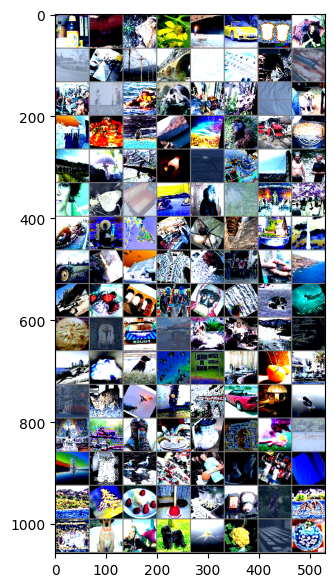

In [ ]:
#Код взят из семинарского листка 3 (https://github.com/hse-ds/iad-deep-learning/blob/master/2023/seminars/03.%20Image%20Classification/03_Image_Classification.ipynb)
def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

images, labels = next(iter(train_dataloader))

plt.figure(figsize=(7,7))
# создадим сетку
img_grid = torchvision.utils.make_grid(images)
#  отобразим изображения
matplotlib_imshow(img_grid, one_channel=False)

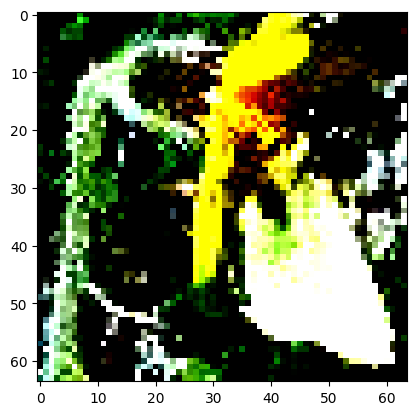

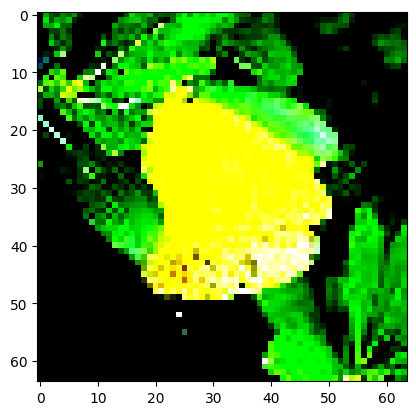

In [ ]:
for batch in val_dataloader:
    images, class_nums = batch
    plt.imshow(images[5].permute(1, 2, 0))
    plt.show()
    plt.imshow(images[19].permute(1, 2, 0))
    plt.show()
    break

## Задание 1.

5 баллов
Добейтесь accuracy на валидации не менее 0.44. В этом задании запрещено пользоваться предобученными моделями и ресайзом картинок.


Для того чтобы выбить скор (считается ниже) на 2.5/5 балла (то есть половину за задание) достаточно соблюдать пару простых жизненных правил:
1. Аугментация (без нее сложно очень будет)
2. Оптимайзеры можно (и нужно) использовать друг с другом. Однако когда что-то проверяете, то не меняйте несколько параметров сразу - собьете логику экспериментов
3. Не используйте полносвязные модели или самые первые сверточные, используйте более современные архитектуры (что на лекциях встречались)
4. Посмотреть все ноутбуки прошедших семинаров и слепить из них что-то общее. Семинарских тетрадок хватит сверх

In [ ]:
from torchvision.models import resnet18 #импортируем не предобученную модель

### Модель (или просто импортируйте не предобученную)

In [ ]:
#Код заимствован из семинарского листка: https://github.com/hse-ds/iad-deep-learning/blob/master/2023/seminars/04.%20Optim%20%26%20Lightning/04_Optim%26Lightning_solution.ipynb
class YourNet(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.model = resnet18(weights=None, num_classes=200) #обозначем количество необходимых классов
        self.loss_func = torch.nn.CrossEntropyLoss()
        self.targets = torch.Tensor()
        self.preds = torch.Tensor()

    def _forward(self, x):
        x = self.model(x)
        return x

    def forward(self, images, target=None):
        output = self._forward(images)

        #получим accuracy
        if target is not None:
            loss = self.loss_func(output, target)
            self.targets = torch.cat((self.targets, target.cpu()), 0)
            pred = torch.argmax(output, dim=-1)
            self.preds = torch.cat((self.preds, pred.cpu()), 0)
            self.accur = accuracy(self.preds.long(), self.targets.long(), task='multiclass', num_classes=200)

            return loss if target is not None else output

    def get_accuracy(self, reset=False):
        if reset:
            self.targets = torch.Tensor()
            self.preds = torch.Tensor()
        return self.accur

### Тренировочный класс lightning

In [ ]:
#Код заимствован из семинарского листка: https://github.com/hse-ds/iad-deep-learning/blob/master/2023/seminars/04.%20Optim%20%26%20Lightning/04_Optim%26Lightning_solution.ipynb
class YourModule(pl.LightningModule):
    def __init__(self, model, learning_rate):
        super().__init__()
        self.model = model
        self.learning_rate = learning_rate

    def forward(self, x):
        result = self.model(x)
        return result

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.learning_rate)
        scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma = 0.92)
        # scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.92) потенциальный шедулер, но показывает результаты чуть хуже - об этом в главе об экспериментах
        return optimizer

    def training_step(self, train_batch, batch_idx):
        images, target = train_batch
        loss = self.model(images, target)
        self.log(
            "train_loss", loss, prog_bar=True
        )
        return loss

    def validation_step(self, val_batch, batch_idx):
        images, target = val_batch
        loss = self.model(images, target)
        self.log("validation_loss", loss, prog_bar=True)
        x, y = val_batch
        preds = self.model._forward(x)
        acc = accuracy(torch.argmax(preds, dim=-1).long(), y.long(), task= 'multiclass', num_classes=200)
        self.log("validation_acc", acc, prog_bar=True)
        return loss

In [ ]:
wandb_logger = WandbLogger(log_model='all')
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

model = YourNet().to(device)
module = YourModule(model, learning_rate = 0.0005)

In [ ]:
trainer = pl.Trainer(logger=wandb_logger, max_epochs = 15, devices = 1)
trainer.fit(module, train_dataloader, val_dataloader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True

INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs

INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

INFO:pytorch_lightning.callbacks.model_summary:

  | Name  | Type    | Params

----------------------------------

0 | model | YourNet | 11.3 M

----------------------------------

11.3 M    Trainable params

0         Non-trainable params

11.3 M    Total params

45.116    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=15` reached.


Дообучим модель на нескольких дополнительных эпохах

In [ ]:
newtrainer = pl.Trainer(logger=wandb_logger, max_epochs = 5, devices = 1)
newtrainer.fit(module, train_dataloader, val_dataloader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True

INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs

INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:634: Checkpoint directory ./lightning_logs/mzk5urew/checkpoints exists and is not empty.

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

INFO:pytorch_lightning.callbacks.model_summary:

  | Name  | Type    | Params

----------------------------------

0 | model | YourNet | 11.3 M

----------------------------------

11.3 M    Trainable params

0         Non-trainable params

11.3 M    Total params

45.116    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.


# Валидация результатов

In [ ]:
def evaluate_task(model, test_dataloader):
    model = model.to(device)
    model.eval()
    accuracy1 = 0.0
    for images, labels in tqdm(test_dataloader):
        images, labels = images.to(device), labels.to(device)
        with torch.no_grad():
            loss = model(images, labels)
            acc_batch = model.get_accuracy(reset=True)
        accuracy1 += acc_batch
    accuracy1 = accuracy1 / len(test_dataloader)
    return accuracy1

In [ ]:
evalmodel =  model.to(device) #wobbly-yogurt-28

accuracyfin = evaluate_task(evalmodel, val_dataloader)
print(f"Оценка за это задание составит {np.clip(10 * accuracyfin / 0.44, 0, 10):.2f} баллов")

100%|██████████| 79/79 [00:09<00:00,  8.03it/s]

Оценка за это задание составит 9.30 баллов


In [ ]:
wandb.finish()

epoch,▁▁▁▁▂▂▃▃▃▃▃▃▄▄▅▅▅▅▅▅▆▆▇▇▇▇▇▇██▁▁▁▁▂▂▃▃▃▃
train_loss,█▇▇▆▆▅▅▅▄▄▄▄▄▄▄▄▃▃▃▃▃▃▂▃▂▃▃▂▂▂▂▂▂▂▁▂▁▂▁▁
trainer/global_step,▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇███▁▁▂▂▂▂▂▃▃▃
validation_acc,▁▃▄▄▆▆▆▆▇▇▇▇████████
validation_loss,█▆▄▄▃▃▂▂▁▁▁▁▁▁▁▁▁▁▂▂
epoch,4
train_loss,1.62433
trainer/global_step,3909
validation_acc,0.4087
validation_loss,2.74826


In [ ]:
wandb.finish() #модель с иными параметрами

epoch,▁▁▁▁▁▁▂▂▃▃▃▃▃▃▃▃▄▄▄▅▅▅▅▅▅▅▅▆▆▇▇▇▇▇▇▇▇███
train_loss,█▇▇▆▆▅▆▅▅▅▄▄▄▄▄▄▃▄▄▄▃▂▃▃▃▃▃▃▂▂▃▂▂▂▁▁▁▁▂▂
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
validation_acc,▁▂▄▅▆▆▆▆▇▇▇████
validation_loss,█▆▅▄▃▃▂▂▁▁▁▁▁▁▁
epoch,14
train_loss,1.9887
trainer/global_step,11729
validation_acc,0.4052
validation_loss,2.60387


In [ ]:
wandb.finish() #модель с иными параметрами

epoch,▁▁▁▁▂▂▃▃▃▃▃▃▄▄▅▅▅▅▅▅▆▆▇▇▇▇▇▇██▁▁▁▁▂▂▃▃▃▃
train_loss,█▇▇▅▆▆▅▅▄▅▄▄▄▄▃▄▃▄▃▄▃▃▃▂▃▃▃▃▂▂▂▁▂▂▁▂▁▁▁▁
trainer/global_step,▁▁▁▂▂▂▂▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▇▇▇▇███▁▁▂▂▂▂▂▃▃▃
validation_acc,▁▂▄▄▅▅▅▇▇▇▇▇▇███████
validation_loss,█▆▄▄▃▃▃▂▂▁▁▁▁▁▁▁▁▁▂▂
epoch,4
train_loss,1.6651
trainer/global_step,3909
validation_acc,0.4075
validation_loss,2.68766


## Задание 2

5 баллов
Добейтесь accuracy на валидации не менее 0.84. В этом задании делать ресайз и использовать претрейн можно.

Для того чтобы выбить скор (считается ниже) на 2.5/5 балла (то есть половину за задание) достаточно соблюдать пару простых жизненных правил:
1. Аугментация (без нее сложно очень будет)
2. Оптимайзеры можно (и нужно) использовать друг с другом. Однако когда что-то проверяете, то не меняйте несколько параметров сразу - собьете логику экспериментов
3. Не используйте полносвязные модели или самые первые сверточные, используйте более современные архитектуры (что на лекциях встречались или можете пойти дальше).
4. Попробуйте сначала посмотреть качество исходной модели без дообучения, сохраните как baseline. Отсюда поймете какие слои нужно дообучать.
5. Посмотреть все ноутбуки прошедших семинаров и слепить из них что-то общее. Семинарских тетрадок хватит сверх

### Модель (или просто импортируйте предобученную)

In [ ]:
from torchvision.models import convnext_large, ConvNeXt_Large_Weights #импортируем предобученные модели

In [ ]:
train_transform =  transforms.Compose(
    [
        transforms.RandomHorizontalFlip(),
        transforms.AutoAugment(transforms.AutoAugmentPolicy.IMAGENET), #классические автоматические аугментации
        ConvNeXt_Large_Weights.DEFAULT.transforms() #требуемые новой моделью преобразования
    ]
)
val_transform = transforms.Compose(
    [
        ConvNeXt_Large_Weights.DEFAULT.transforms() #требуемые новой моделью преобразования
    ]
)


train_dataset = ImageFolder('dataset/dataset/train', transform=train_transform)
val_dataset = ImageFolder('dataset/dataset/val', transform=val_transform)

train_dataloader = DataLoader(
    train_dataset,
    batch_size=128,
    shuffle=True,
    pin_memory=True)

val_dataloader = DataLoader(
    val_dataset,
    batch_size=128,
    shuffle=False,
    pin_memory=True)

In [ ]:
model = convnext_large(weights=ConvNeXt_Large_Weights.DEFAULT)
model #получим информацию о модели

In [ ]:
class YourNet(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.model = convnext_large(weights='DEFAULT')
        #меняем слой, чтобы число выходов совпадало
        self.model.classifier[2] = nn.Identity()
        self.mymodel = nn.Linear(in_features=1536, out_features=200, bias=True)
        self.loss_func = torch.nn.CrossEntropyLoss()
        self.targets = torch.Tensor()
        self.preds = torch.Tensor()

    def _forward(self, x):
        with torch.no_grad():
            features = self.model(x)
        res = self.mymodel(features)
        return res

    def forward(self, images, target=None):
        output = self._forward(images)

        if target is not None:
            loss = self.loss_func(output, target)
            self.targets = torch.cat((self.targets, target.cpu()), 0)
            pred = torch.argmax(output, dim=-1)
            self.preds = torch.cat((self.preds, pred.cpu()), 0)
            self.accur = accuracy(self.preds.long(), self.targets.long(), task='multiclass', num_classes=200)

            return loss if target is not None else output

    def get_accuracy(self, reset=False):
        if reset:
            self.targets = torch.Tensor()
            self.preds = torch.Tensor()
        return self.accur

### Тренировочный класс lightning

In [ ]:
class YourModule(pl.LightningModule):
    def __init__(self, model, learning_rate):
        super().__init__()
        self.model = model
        self.learning_rate = learning_rate

    def forward(self, x):
        result = self.model(x)
        return result

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.learning_rate)
#         scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma = 0.9)
        scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.92)
        return optimizer


    def training_step(self, train_batch, batch_idx):
        images, target = train_batch
        loss = self.model(images, target)
        self.log(
            "train_loss", loss, prog_bar=True
        )
        return loss

    def validation_step(self, val_batch, batch_idx):
        images, target = val_batch
        loss = self.model(images, target)
        self.log("validation_loss", loss, prog_bar=True)
        x, y = val_batch
        preds = self.model._forward(x)
        acc = accuracy(torch.argmax(preds, dim=-1).long(), y.long(), task= 'multiclass', num_classes=200)
        self.log("validation_acc", acc, prog_bar=True)
        return loss

In [ ]:
wandb_logger = WandbLogger(log_model='all')
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

model = YourNet().to(device)
module = YourModule(model, learning_rate = 0.001)

In [ ]:
trainer = pl.Trainer(logger=wandb_logger, max_epochs = 1, devices = 1)
trainer.fit(module, train_dataloader, val_dataloader)

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

### Валидация результатов задания

In [ ]:
evalmodel = model.to(device)

finaccuracy = evaluate_task(evalmodel, val_dataloader)
print(f"Оценка за это задание составит {np.clip(10 * (finaccuracy - 0.5) / 0.34, 0, 10):.2f} баллов")


100%|██████████| 79/79 [04:06<00:00,  3.12s/it]

Оценка за это задание составит 10.00 баллов


In [ ]:
accuracy

tensor(0.6297)

In [ ]:
wandb.finish()

epoch,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_loss,█▅▃▂▃▂▂▁▁▁▁▁▁▂▁
trainer/global_step,▁▁▂▂▃▃▄▄▅▅▆▆▇▇██
validation_acc,▁
validation_loss,▁
epoch,0
train_loss,1.28496
trainer/global_step,781
validation_acc,0.8531
validation_loss,0.57678


# Отчёт об экспериментах

Ссылка на wandb с итоговым отчетом: https://api.wandb.ai/links/rgusseinov/ivk40blc

# Задание 1

Попытка создать свою архитектуру не увенчалась успехом, поэтому я импортировал две непредобученные модели: resnet18 и resnet50.

Несмотря на то, что resnet50 является более глубокой моделью, чем resnet18 (имеет 50 слоев соответственно), она не показывала хороших результатов и accuracy на валидации у нее был предельно мал. Решил не включать в итоговый отчет.

В итоге я остановился на resnet18 и более не прибегал к иным непредобученным моделям. В качестве лосса я сразу взял CrossEntropyLoss и не прибегал к иным вариантам (судя по семинарским листкам, этот лосс вполне приемлем и показывает неплохие результаты).

Основные эксперименты касались подбора гиперпараметров: аугментации, learning rate, шедулера к оптимайзеру. Оптимайзер изначально был выбран Adam и впоследствии не изменялся. Изначально модели обучались с weight_decay равным 0.001, но ближе к концу избавился от weight_decay и модель стала показывать лучше результаты.

При первых обучениях модели использовались многочисленные аугментации (и повороты, и ColorJitter, и Flipы). Accuracy на валидации при таких аугментациях не превышал 0.2. В итоге остановился на автоматической аугментации при предварительном случайном повороте.

Два практически идентичных в своем качестве оптимайзера - StepLR и ExponentialLR. Все-таки экспоненциальный дает чуть лучше качество, если немного поиграться с гаммой (сильно меняется результат даже при незначительном изменении гаммы, я пробовал 0.9, 0.91, 0.92).

То же самое касается и итогового значения learning rate. Вообще я пытался получить оптимальный learning rate с помощью Tuner, но использование learning rate при нем показывает результаты гораздо хуже. Пример использования - ниже


In [ ]:
from pytorch_lightning.tuner.tuning import Tuner
model = YourNet().to(device)
module = YourModule(model, learning_rate = 0.0005)
trainer = pl.Trainer(logger=wandb_logger, max_epochs=20, devices = 1)
tuner = Tuner(trainer)
lr_finder = tuner.lr_find(module, train_dataloader, val_dataloader)
lr_finder.suggestion()

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True

INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores

INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs

INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:634: Checkpoint directory ./lightning_logs/mzk5urew/checkpoints exists and is not empty.

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=100` reached.

INFO:pytorch_lightning.tuner.lr_finder:Learning rate set to 0.15848931924611143

INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at /content/.lr_find_1d5d4d22-5a88-4f44-8ac5-5bc25d0d1aa0.ckpt

INFO:pytorch_lightning.utilities.rank_zero:Restored all states from the checkpoint at /content/.lr_find_1d5d4d22-5a88-4f44-8ac5-5bc25d0d1aa0.ckpt


0.15848931924611143

Короче, в итоге learning rate подбирал эмпирически и остановился на значении 0.0005. Еще неплохим значением является 0.001. С помощью кода из семинарского листка 4 отобразим работу шедулера



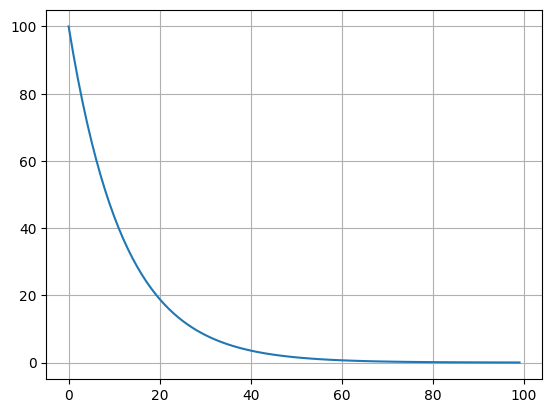

In [ ]:
def get_simple_model_optimizer():
    simple_model = torch.nn.Linear(2, 1)
    simple_optimizer = torch.optim.SGD(model.parameters(), lr=100)
    return simple_model, simple_optimizer


def draw_learning_rate_curve(optimizer, scheduler):
    lrs = []
    for i in range(100):
        optimizer.step()
        lrs.append(optimizer.param_groups[0]["lr"])
        scheduler.step()
    plt.grid()
    plt.plot(range(100), lrs)


model, optimizer = get_simple_model_optimizer()
scheduler = scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.92)
draw_learning_rate_curve(optimizer, scheduler)

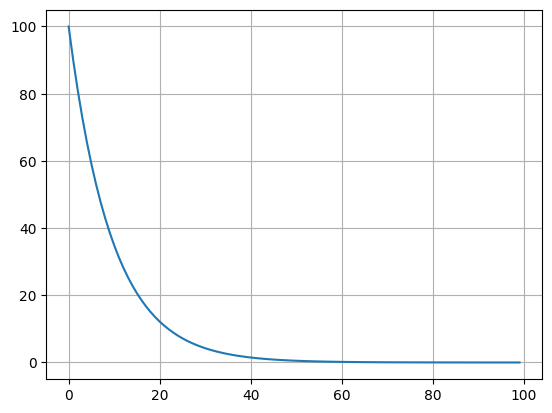

In [ ]:
model, optimizer = get_simple_model_optimizer()
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma = 0.9)
draw_learning_rate_curve(optimizer, scheduler)

Видим, что логика работы шедулеров предельно похожа, что обосновывает практически идентичные результаты

Также стоит отметить, что при данных шедулерах обучения на 15 эпохах недостаточно (обучения всех моделей проводил с таким количеством эпох). Потому в первом задании, если модель потенциально показывала неплохой результат, проводилось дообучение на 5 эпохах (оно не отображается в wandb, так и не понял, как зафиксировать дообучение).

Тут приведу работу resnet50 (только 10 эпох)

In [ ]:
from torchvision.models import resnet50
class YourNet(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.model = resnet50(weights=None, num_classes=200)
        self.loss_func = torch.nn.CrossEntropyLoss()
        self.targets = torch.Tensor()
        self.preds = torch.Tensor()

    def _forward(self, x):
        x = self.model(x)
        return x

    def forward(self, images, target=None):
        output = self._forward(images)

        # get accuracy score and save it to self.accuracy
        if target is not None:
            loss = self.loss_func(output, target)
            self.targets = torch.cat((self.targets, target.cpu()), 0)
            pred = torch.argmax(output, dim=-1)
            self.preds = torch.cat((self.preds, pred.cpu()), 0)
            self.accur = accuracy(self.preds.long(), self.targets.long(), task='multiclass', num_classes=200)

            return loss if target is not None else output

    def get_accuracy(self, reset=False):
        if reset:
            self.targets = torch.Tensor()
            self.preds = torch.Tensor()
        return self.accur

wandb_logger = WandbLogger(log_model='all')
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

model = YourNet().to(device)
module = YourModule(model, learning_rate = 0.001)

wandb: Currently logged in as: rgusseinov. Use `wandb login --relogin` to force relogin


In [ ]:
trainer = pl.Trainer(logger=wandb_logger, max_epochs = 10, devices = 1)
trainer.fit(module, train_dataloader, val_dataloader)

Sanity Checking: 0it [00:00, ?it/s]

/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

In [ ]:
wandb.finish()

epoch,▁▁▁▁▂▂▂▂▃▃▃▃▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▆▆▆▆▇▇▇▇████
train_loss,██▇▇▇▆▆▅▅▄▅▅▄▄▄▄▃▃▃▃▃▃▃▃▃▂▃▂▂▂▂▂▂▁▂▂▁▂▃▁
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
validation_acc,▁▃▄▅▆▅▇▇▇█
validation_loss,█▂▂▂▁▂▂▁▁▁
epoch,9
train_loss,2.61998
trainer/global_step,7819
validation_acc,0.3764
validation_loss,2.8932


Обучим модель с множеством аугментаций (без применения автоматической аугментации)


In [ ]:
train_transform =  transforms.Compose(
    [
        transforms.ColorJitter(hue=0.05, saturation=0.05),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(20),
        transforms.ToTensor(),
        transforms.Normalize([0.4802, 0.4481, 0.3975], [0.2296, 0.2263, 0.2255])
    ]
)
val_transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize([0.4802, 0.4481, 0.3975], [0.2296, 0.2263, 0.2255])
    ]
)

In [ ]:
class YourNet(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.model = resnet18(weights=None, num_classes=200)
        self.loss_func = torch.nn.CrossEntropyLoss()
        self.targets = torch.Tensor()
        self.preds = torch.Tensor()

    def _forward(self, x):
        x = self.model(x)
        return x

    def forward(self, images, target=None):
        output = self._forward(images)

        # get accuracy score and save it to self.accuracy
        if target is not None:
            loss = self.loss_func(output, target)
            self.targets = torch.cat((self.targets, target.cpu()), 0)
            pred = torch.argmax(output, dim=-1)
            self.preds = torch.cat((self.preds, pred.cpu()), 0)
            self.accur = accuracy(self.preds.long(), self.targets.long(), task='multiclass', num_classes=200)

            return loss if target is not None else output

    def get_accuracy(self, reset=False):
        if reset:
            self.targets = torch.Tensor()
            self.preds = torch.Tensor()
        return self.accur

wandb_logger = WandbLogger(log_model='all')
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

model = YourNet().to(device)
module = YourModule(model, learning_rate = 0.001)

In [ ]:
trainer = pl.Trainer(logger=wandb_logger, max_epochs = 10, devices = 1)
trainer.fit(module, train_dataloader, val_dataloader)

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

In [ ]:
wandb.finish()

epoch,▁▁▁▁▂▂▂▂▃▃▃▃▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▆▆▆▆▇▇▇▇████
train_loss,█▇▆▆▅▅▅▅▄▅▄▄▄▄▄▄▃▃▃▃▂▃▃▃▂▂▂▂▂▂▂▂▁▂▂▂▂▁▂▂
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
validation_acc,▁▃▃▅▆▇▇▇██
validation_loss,█▆▆▄▃▂▂▂▂▁
epoch,9
train_loss,2.70588
trainer/global_step,7819
validation_acc,0.3726
validation_loss,2.63502


Ну и попробуем поставить weight_decay

In [ ]:
class YourModule(pl.LightningModule):
    def __init__(self, model, learning_rate):
        super().__init__()
        self.model = model
        self.learning_rate = learning_rate

    def forward(self, x):
        result = self.model(x)
        return result

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.learning_rate, weight_decay = 0.001)
        scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma = 0.92)
        # scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.92)
        return optimizer

    def training_step(self, train_batch, batch_idx):
        images, target = train_batch
        loss = self.model(images, target)
        self.log(
            "train_loss", loss, prog_bar=True
        )
        return loss

    def validation_step(self, val_batch, batch_idx):
        images, target = val_batch
        loss = self.model(images, target)
        self.log("validation_loss", loss, prog_bar=True)
        x, y = val_batch
        preds = self.model._forward(x)
        acc = accuracy(torch.argmax(preds, dim=-1).long(), y.long(), task= 'multiclass', num_classes=200)
        self.log("validation_acc", acc, prog_bar=True)
        return loss

wandb_logger = WandbLogger(log_model='all')
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

model = YourNet().to(device)
module = YourModule(model, learning_rate = 0.001)

In [ ]:
trainer = pl.Trainer(logger=wandb_logger, max_epochs = 10, devices = 1)
trainer.fit(module, train_dataloader, val_dataloader)

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

In [ ]:
wandb.finish()

epoch,▁▁▁▁▂▂▂▂▃▃▃▃▃▃▃▃▄▄▄▄▅▅▅▅▆▆▆▆▆▆▆▆▇▇▇▇████
train_loss,██▆▆▅▅▄▄▃▄▃▃▃▄▃▃▃▃▃▃▂▃▂▃▂▂▁▂▃▂▃▂▂▂▁▂▁▁▁▂
trainer/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
validation_acc,▁▃▄▅▆▆▇███
validation_loss,█▅▄▄▃▂▂▁▁▁
epoch,9
train_loss,3.31289
trainer/global_step,7819
validation_acc,0.2663
validation_loss,3.14904


# Задание 2

Во втором задании эксперименты фактически не проводились благодаря тщательной подготовительной работе. Я изначально импортировал convnext_large, провел соответствующие образования, требуемые моделью, а остальные гиперпараметры оставил фактически идентичными с первого задания в качестве отправного пункта. Я не фиксировал в wandb запуск модели с exponentialLR, но он так же достигает требуемого accuracy, как и StepLR (в предыдущей заметке мы уже указали, что поведение шедулеров очень похоже). При этом в wandb я зафиксировал только один запуск модели (второй запуск), который сразу дал необходимый результат.

Отчеты для первого и второго задания скомбинированы в wandb по ссылке выше